# Data Set Information

In this project, we use the Cardiotocography (CTG) data set available on the
University of California Irvine Machine Learning Repository website at https://archive.ics.uci.edu/ml
/datasets/cardiotocography.

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features were measured. The CTGs were also classified by three expert obstetricians and a consensus classification label, labeled as NSP (Normal (1),
Suspect (2), or Pathologic (3)). 

Here is a list of 21 features, and 1 response labeled as NSP.

LB - FHR baseline (beats per minute)

AC - No. of accelerations per second

FM - No. of fetal movements per second

UC - No. of uterine contractions per second

DL - No. of light decelerations per second

DS - No. of severe decelerations per second

DP - No. of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - No. of histogram peaks

Nzeros - No. of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (1 = normal; 2 = suspect; 3 = pathologic)

# Objective

The aim is to use the given features to write different machine learning algorithms and compare their accuracies to predict the NSP state of 1, 2 or 3.

Import different Python packages.

In [3]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
t0 = time.time()

Import the data set.

In [5]:
path = os.getcwd() + "/Cardiotocographic.csv"
data = pd.read_csv(path)
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


Check the different column names.

In [6]:
data.keys()

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object')

See the size of the data set.

In [7]:
data.shape

(2126, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

Check the missing values in the datset.

In [9]:
data.isnull().sum().sum()

0

Number of Normal, Suspect and Pathologic entries in the dataframe.

In [10]:
pd.DataFrame({
    'Normal : 1' : [sum(data.NSP == 1)],
    'Suspect : 2' : [sum(data.NSP == 2)],
    'Pathologic : 3' : [sum(data.NSP == 3)]
}, index = ['Count'])

,Normal : 1,Suspect : 2,Pathologic : 3
Count,1655,295,176


The data set is highly imbalanced with high number of labels labelled as Normal.

Calculate the percentage of Normal cases in the dataset.

In [11]:
print("There are " + str(round(sum(data.NSP == 1)/(data.shape[0])*100, 2)) + " percent of Normal cases in the dataset." )

There are 77.85 percent of Normal cases in the dataset.


In [12]:
print("Therefore, our machine learning model should have an accuracy value of more than " + str(round(sum(data.NSP == 1)/(data.shape[0])*100, 2)) + " percent.")

Therefore, our machine learning model should have an accuracy value of more than 77.85 percent.


Separate features X and target Y.

In [13]:
X = data.drop(columns= 'NSP')
Y = data.NSP

Scale the features.

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.35222005, -0.82140279, -0.20304786, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.83182602, -0.20304786, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439,  0.03953946, -0.20304786, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56734045, -0.20304786, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.64547355, -0.20304786, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.40275392, -0.16842401, ...,  0.47774325,
        -0.61469058, -0.52452553]])

Split the data into training and testing datsets.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,  train_size = 0.70, random_state = 2)

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 2)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

Accuracy of the Decision Tree Classifier model on training data set.

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(dt.predict(X_train), Y_train)

0.9993279569892473

Accuracy of the Decision Tree Classifier model on testing data set.

In [18]:
accuracy_score(dt.predict(X_test), Y_test)

0.9106583072100314

GridSearchCV for hyperparameter tuning.

In [19]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' : ('gini', 'entropy'),
    'splitter' : ('best', 'random'),
    'min_samples_split' : range(2, 10),
    'max_leaf_nodes' : np.arange(20, 200, 10)
}

gs_dt = GridSearchCV(
    estimator = dt,
    param_grid = parameter,
    cv = 5,
    return_train_score = True    
)
gs_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_leaf_nodes': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190]),
                         'min_samples_split': range(2, 10),
                         'splitter': ('best', 'random')},
             return_train_score=True)

Best score obtained for the hyperparameter tuning cross-validation.

In [20]:
gs_dt.best_score_

0.9207014213725623

Best parameter values after the hyperparameter tuning.

In [21]:
gs_dt.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 50,
 'min_samples_split': 5,
 'splitter': 'best'}

In [22]:
gs_results = pd.DataFrame(gs_dt.cv_results_)
gs_results = gs_results[['mean_test_score', 'mean_train_score', 'params']]
gs_results.head()

,mean_test_score,mean_train_score,params
0,0.915326,0.951613,"{'criterion': 'gini', 'max_leaf_nodes': 20, 'm..."
1,0.881728,0.903897,"{'criterion': 'gini', 'max_leaf_nodes': 20, 'm..."
2,0.915326,0.951613,"{'criterion': 'gini', 'max_leaf_nodes': 20, 'm..."
3,0.881728,0.903897,"{'criterion': 'gini', 'max_leaf_nodes': 20, 'm..."
4,0.915326,0.951613,"{'criterion': 'gini', 'max_leaf_nodes': 20, 'm..."


Best mean_test_score after hyperparameter tuning.

In [23]:
gs_results[gs_results.mean_test_score == gs_dt.best_score_]

,mean_test_score,mean_train_score,params
54,0.920701,0.984375,"{'criterion': 'gini', 'max_leaf_nodes': 50, 'm..."


Decision Tree Classifier model accuracy with optimized parameters.

In [24]:
dt_optimized = DecisionTreeClassifier(
    random_state = 2,
    criterion = gs_dt.best_params_['criterion'],
    max_leaf_nodes = gs_dt.best_params_['max_leaf_nodes'],
    min_samples_split = gs_dt.best_params_['min_samples_split'],
    splitter = gs_dt.best_params_['splitter']
)
dt_optimized.fit(X_train, Y_train)
yhat_dt = dt_optimized.predict(X_test)

Accuracy of the Optimized Decision Tree Classifier model on training data set.

In [25]:
accuracy_train_dt = accuracy_score(dt_optimized.predict(X_train), Y_train)
accuracy_train_dt

0.978494623655914

Accuracy of the Optimized Decision Tree Classifier model on testing data set.

In [26]:
accuracy_test_dt = accuracy_score(yhat_dt, Y_test)
accuracy_test_dt

0.9263322884012539

In [27]:
print("The overall accuracy for the optimized Decision Tree Classifier model on the testing data set is", str(100*round(accuracy_test_dt, 5)),"%.")

The overall accuracy for the optimized Decision Tree Classifier model on the testing data set is 92.633 %.


Confusion matrix for Decision Tree Classifier model.

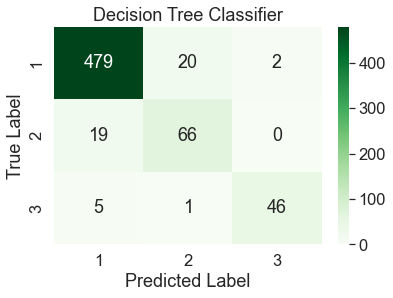

In [28]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
g =sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_dt), annot= True, cmap= 'Greens', fmt = 'g')
g.set_xticklabels(['1', '2', '3'])
g.set_yticklabels(['1', '2', '3']);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Classifier');

# Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

Accuracy of the Randorm Forest Model on training data set.

In [30]:
round(accuracy_score(rf.predict(X_train), Y_train), 4)

0.9993

Accuracy of the Randorm Forest Model on testing data set.

In [31]:
round(accuracy_score(rf.predict(X_test), Y_test), 4)

0.942

Optimize the number of trees in the model.

In [32]:
accuracy = []
n_trees = np.arange(1, 150, 3)
for tree in n_trees:
    rf_iter = RandomForestClassifier(n_estimators= tree, random_state = 2)
    rf_iter.fit(X_train, Y_train)
    accuracy_iter = accuracy_score(rf_iter.predict(X_train), Y_train)
    accuracy.append(accuracy_iter)

Text(0, 0.5, 'Accuracy')

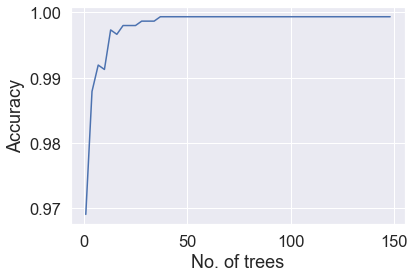

In [33]:
sns.set_style('whitegrid')
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
sns.lineplot(x = n_trees, y = accuracy)
plt.xlabel('No. of trees')
plt.ylabel('Accuracy')

In [34]:
print("The maximum accuracy on training data set obtained is ",   str(100*round(max(accuracy), 4)), "%, and the corresponding number of trees are "+str(min(n_trees[accuracy == max(accuracy)]))+'.')

The maximum accuracy on training data set obtained is  99.92999999999999 %, and the corresponding number of trees are 37.


Random forest model with optimized number of trees.

In [35]:
rf_optimized = RandomForestClassifier(n_estimators= min(n_trees[accuracy == max(accuracy)]), random_state= 2)
rf_optimized.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=37, random_state=2)

Accuracy for the optimized Random forest model on training data set.

In [36]:
accuracy_train_rf = accuracy_score(rf_optimized.predict(X_train), Y_train)
accuracy_train_rf

0.9993279569892473

Accuracy for the optimized Random forest model on testing data set.

In [37]:
yhat_rf = rf_optimized.predict(X_test)
accuracy_test_rf = accuracy_score(yhat_rf, Y_test)
accuracy_test_rf

0.9373040752351097

In [38]:
print("On the testing dataset using the Random Forest model, an overall accuracy of " + str(100*accuracy_test_rf)+ "% is achieved.")

On the testing dataset using the Random Forest model, an overall accuracy of 93.73040752351098% is achieved.


Confusion Matrix for Random Forest Model.

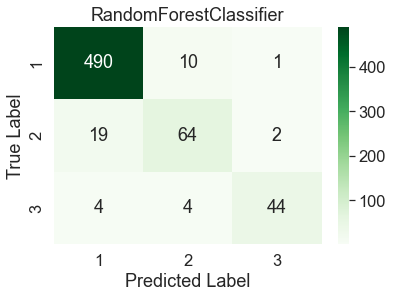

In [39]:
sns.set_style('whitegrid')
sns.set(font_scale= 1.5)
plt.figure(figsize = (6,4))
g = sns.heatmap(confusion_matrix(y_pred = yhat_rf, y_true = Y_test), annot = True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
g.set_xticklabels(['1', '2', '3'])
g.set_yticklabels(['1', '2', '3']);
plt.title('RandomForestClassifier');

# K-Nearest Neighbors Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Accuracy of the Randorm K-Nearest neighbors model on training data set.

In [41]:
accuracy_score(knn.predict(X_train), Y_train)

0.9348118279569892

Accuracy of the Randorm K-Nearest neighbors model on testing data set.

In [42]:
accuracy_score(knn.predict(X_test), Y_test)

0.8996865203761756

GridSearchCV for hyperparameter tuning.



In [43]:
parameters = {
    'n_neighbors' : range(1, 30),
    'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'weights' : ('uniform', 'distance')
}
gs_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters,
    cv = 5,
    return_train_score =  True
)
gs_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': range(1, 30),
                         'weights': ('uniform', 'distance')},
             return_train_score=True)

Best score obtained for the hyperparameter tuning cross-validation.

In [44]:
round(gs_knn.best_score_, 5)

0.90726

Best parameter values after the hyperparameter tuning.



In [45]:
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [46]:
gs_results = pd.DataFrame(gs_knn.cv_results_)
gs_results = gs_results[['mean_test_score', 'mean_train_score', 'params']]
gs_results

,mean_test_score,mean_train_score,params
0,0.897175,0.999496,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
1,0.897175,0.999496,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
2,0.889784,0.944893,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh..."
3,0.897175,0.999496,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh..."
4,0.891137,0.948253,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh..."
...,...,...,...
227,0.892477,0.999496,"{'algorithm': 'brute', 'n_neighbors': 27, 'wei..."
228,0.881723,0.889785,"{'algorithm': 'brute', 'n_neighbors': 28, 'wei..."
229,0.891133,0.999496,"{'algorithm': 'brute', 'n_neighbors': 28, 'wei..."
230,0.880383,0.890289,"{'algorithm': 'brute', 'n_neighbors': 29, 'wei..."


Best mean_test_score after hyperparameter tuning.

In [47]:
gs_results[gs_results.mean_test_score == gs_knn.best_score_]

,mean_test_score,mean_train_score,params
9,0.907261,0.999496,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."
67,0.907261,0.999496,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '..."
125,0.907261,0.999496,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'we..."
183,0.907261,0.999496,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig..."


K-Nearest Neighbors model accuracy with optimized parameters.

In [48]:
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [49]:
knn_optimized = KNeighborsClassifier(
    n_neighbors = gs_knn.best_params_['n_neighbors'],
    algorithm = gs_knn.best_params_['algorithm'],
    weights = gs_knn.best_params_['weights']
)
knn_optimized.fit(X_train, Y_train)
yhat_knn = knn_optimized.predict(X_test)

Overall accuracy of optimized K-Nearest Neighbors classifier on training set.

In [50]:
accuracy_train_knn = accuracy_score(knn_optimized.predict(X_train), Y_train)

Overall accuracy of optimized K-Nearest Neighbors classifier on testing set.

In [51]:
accuracy_test_knn = accuracy_score(yhat_knn, Y_test)
accuracy_test_knn

0.9106583072100314

In [52]:
print("The overall accuracy for the optimized K-Nearest Neighbors model on the testing data set is", str(100*round(accuracy_test_knn, 4)),"%.")

The overall accuracy for the optimized K-Nearest Neighbors model on the testing data set is 91.07 %.


Confusion Matrix for optimized K-Nearest Neighbors model.

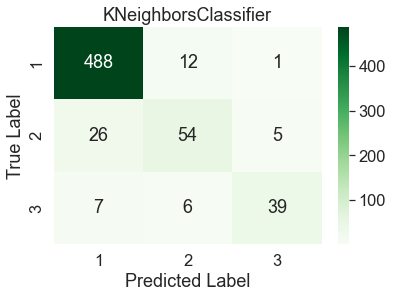

In [53]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
g =sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_knn), annot= True, cmap= 'Greens', fmt = 'g')
g.set_xticklabels(['1', '2', '3'])
g.set_yticklabels(['1', '2', '3']);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNeighborsClassifier');

# Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, random_state = 2)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=2)

Accuracy of the logistic regression model on training data set.

In [55]:
accuracy_score(lr.predict(X_train), Y_train)

0.9018817204301075

Accuracy of the logistic regression model on testing data set.

In [56]:
accuracy_score(lr.predict(X_test), Y_test)

0.9043887147335423

GridSearchCV for hyperparameter tuning.

In [57]:
parameters = {
    'C' : (0.01, 0.1, 1),
    'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'warm_start' : (True, False)
}
gs_lr = GridSearchCV(
    estimator = lr,
    param_grid = parameters,
    cv = 5,
    return_train_score = True
)
gs_lr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=2),
             param_grid={'C': (0.01, 0.1, 1),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'),
                         'warm_start': (True, False)},
             return_train_score=True)

Best score obtained for the hyperparameter tuning cross-validation.

In [58]:
gs_lr.best_score_

0.8985243938264074

Best parameter values after the hyperparameter tuning.

In [59]:
gs_lr.best_params_

{'C': 1, 'solver': 'newton-cg', 'warm_start': True}

In [60]:
gs_results = pd.DataFrame(gs_lr.cv_results_)
gs_results = gs_results[['mean_test_score', 'mean_train_score', 'params']]
gs_results

,mean_test_score,mean_train_score,params
0,0.878354,0.880544,"{'C': 0.01, 'solver': 'newton-cg', 'warm_start..."
1,0.878354,0.880544,"{'C': 0.01, 'solver': 'newton-cg', 'warm_start..."
2,0.878354,0.880544,"{'C': 0.01, 'solver': 'lbfgs', 'warm_start': T..."
3,0.878354,0.880544,"{'C': 0.01, 'solver': 'lbfgs', 'warm_start': F..."
4,0.870967,0.875671,"{'C': 0.01, 'solver': 'liblinear', 'warm_start..."
5,0.870967,0.875671,"{'C': 0.01, 'solver': 'liblinear', 'warm_start..."
6,0.878354,0.880544,"{'C': 0.01, 'solver': 'sag', 'warm_start': True}"
7,0.878354,0.880544,"{'C': 0.01, 'solver': 'sag', 'warm_start': False}"
8,0.878354,0.880544,"{'C': 0.01, 'solver': 'saga', 'warm_start': True}"
9,0.878354,0.880544,"{'C': 0.01, 'solver': 'saga', 'warm_start': Fa..."


In [61]:
gs_lr.best_params_

{'C': 1, 'solver': 'newton-cg', 'warm_start': True}

Optimized Linear Regression Model.

In [62]:
lr_optimized = LogisticRegression(
    random_state = 2,
    C = gs_lr.best_params_['C'],
    solver = gs_lr.best_params_['solver'],
    warm_start = gs_lr.best_params_['warm_start']
)
lr_optimized.fit(X_train, Y_train)
yhat_lr = lr_optimized.predict(X_test)

Overall accuracy for the Logistic Regression model on training set.

In [63]:
accuracy_train_lr = accuracy_score(lr_optimized.predict(X_train), Y_train)
accuracy_train_lr

0.9018817204301075

Overall accuracy for the Logistic Regression model on testing set.

In [64]:
accuracy_test_lr = accuracy_score(yhat_lr, Y_test)
accuracy_test_lr

0.9043887147335423

In [65]:
print("The overall accuracy for the optimized Logistic regression model on the testing data set is", str(100*round(accuracy_test_lr, 4)),"%.")

The overall accuracy for the optimized Logistic regression model on the testing data set is 90.44 %.


The accuracy did not improve after hyperparameter tuning, which indicates that the default parameters for the logistic regression model are the optimum parameters.

# Support Vector Machine Model

In [66]:
from sklearn.svm import SVC
svc = SVC(random_state = 2)
svc.fit(X_train, Y_train)

SVC(random_state=2)

Accuracy of the Support Vector Machine model on training data set.

In [67]:
round(accuracy_score(svc.predict(X_train), Y_train), 5)

0.92406

Accuracy of the Support Vector Machine model on testing data set.

In [68]:
round(accuracy_score(svc.predict(X_test), Y_test), 5)

0.91693

GridSearchCV for hyperparameter tuning.

In [69]:
parameters = {
 'C' : (0.001, 0.01, 0.1, 1, 10, 100),
 'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
 'gamma' : ('auto', 'scale'),
}
gs_svm = GridSearchCV(
    estimator = svc,
    param_grid = parameters,
    cv = 5,
    return_train_score = True
)
gs_svm.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100),
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             return_train_score=True)

Best score obtained for the hyperparameter tuning cross-validation.

In [70]:
gs_svm.best_score_

0.9274218697037488

Best parameter values after the hyperparameter tuning.

In [71]:
gs_svm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [72]:
gs_results = pd.DataFrame(gs_svm.cv_results_)
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [73]:
gs_results = gs_results[['mean_test_score', 'mean_train_score', 'params']]
gs_results.head()

,mean_test_score,mean_train_score,params
0,0.794357,0.796371,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'linear'}"
1,0.790324,0.791163,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'poly'}"
2,0.775538,0.775538,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}"
3,0.775538,0.775538,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'sigmo..."
4,0.794357,0.796371,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'line..."


Best mean_test_score after hyperparameter tuning.

In [74]:
gs_results[gs_results.mean_test_score == gs_svm.best_score_]

,mean_test_score,mean_train_score,params
38,0.927422,0.963878,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"


Support Vector Machine model accuracy with optimized parameters.

In [75]:
svc_optimized = SVC(
    random_state = 2,
    C = gs_svm.best_params_['C'],
    gamma = gs_svm.best_params_['gamma'],
    kernel = gs_svm.best_params_['kernel']
)
svc_optimized.fit(X_train, Y_train)
yhat_svc = svc_optimized.predict(X_test)

Accuracy of the Optimized Support Vector Machine model on training data set.

In [76]:
accuracy_train_svc = accuracy_score(svc_optimized.predict(X_train), Y_train)
accuracy_train_svc

0.9623655913978495

Accuracy of the Optimized Support Vector Machine model on testing data set.

In [77]:
accuracy_test_svc = accuracy_score(yhat_svc, Y_test)
accuracy_test_svc

0.9341692789968652

In [78]:
print("The overall accuracy for the optimized Support Vector Machine model on the testing data set is", str(100*round(accuracy_test_svc, 4)),"%.")


The overall accuracy for the optimized Support Vector Machine model on the testing data set is 93.42 %.


Confusion Matrix for optimized Support Vector Machine model.

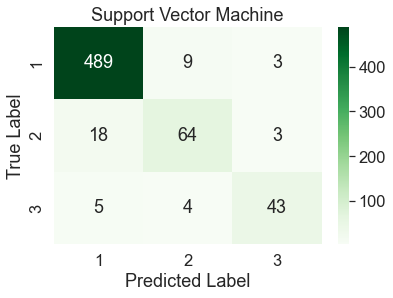

In [79]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
g =sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_svc), annot= True, cmap= 'Greens', fmt = 'g')
g.set_xticklabels(['1', '2', '3'])
g.set_yticklabels(['1', '2', '3']);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Support Vector Machine');

# AdaBoost Classifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state = 2)
adb.fit(X_train, Y_train)

AdaBoostClassifier(random_state=2)

Accuracy of the AdaBoost Classifier model on training data set.

In [81]:
round(accuracy_score(adb.predict(X_train), Y_train), 5)

0.90121

Accuracy of the AdaBoost Classifier model on testing data set.

In [82]:
round(accuracy_score(adb.predict(X_test), Y_test), 5)

0.88088

GridSearchCV for hyperparameter tuning.

In [83]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'base_estimator' : [DecisionTreeClassifier(), LogisticRegression()],
    'learning_rate' : (0.0001, 0.001, 0.01, 1),
    'algorithm' : ('SAMME', 'SAMME.R'),
}
gs_adb = GridSearchCV(
    estimator = adb,
    param_grid = parameter,
    cv = 5,
    return_train_score = True
)
gs_adb.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=2),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'base_estimator': [DecisionTreeClassifier(),
                                            LogisticRegression()],
                         'learning_rate': (0.0001, 0.001, 0.01, 1)},
             return_train_score=True)

Best score obtained for the hyperparameter tuning cross-validation.



In [84]:
gs_adb.best_score_

0.9274173502361421

Best parameter values after the hyperparameter tuning.

In [85]:
gs_adb.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 1}

In [86]:
gs_results = pd.DataFrame(gs_adb.cv_results_)
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algorithm', 'param_base_estimator', 'param_learning_rate',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [87]:
gs_results = gs_results[['mean_test_score', 'mean_train_score', 'params']]
gs_results.head()

,mean_test_score,mean_train_score,params
0,0.918679,0.999496,"{'algorithm': 'SAMME', 'base_estimator': Decis..."
1,0.917337,0.999496,"{'algorithm': 'SAMME', 'base_estimator': Decis..."
2,0.918008,0.999496,"{'algorithm': 'SAMME', 'base_estimator': Decis..."
3,0.922713,0.999496,"{'algorithm': 'SAMME', 'base_estimator': Decis..."
4,0.783601,0.786626,"{'algorithm': 'SAMME', 'base_estimator': Logis..."


Best mean_test_score after hyperparameter tuning.

In [88]:
gs_results[gs_results.mean_test_score == gs_adb.best_score_]

,mean_test_score,mean_train_score,params
11,0.927417,0.999496,"{'algorithm': 'SAMME.R', 'base_estimator': Dec..."


Ada Boost Classifier accuracy with optimized parameters.

In [89]:
adb_optimized = AdaBoostClassifier(
    random_state = 2,
    base_estimator = gs_adb.best_params_['base_estimator'],
    learning_rate = gs_adb.best_params_['learning_rate'],
    algorithm = gs_adb.best_params_['algorithm']
)
adb_optimized.fit(X_train, Y_train)
yhat_adb = adb_optimized.predict(X_test)

Accuracy of the Optimized AdaBoost Classifier model on training data set.

In [90]:
accuracy_train_adb = accuracy_score(adb_optimized.predict(X_train), Y_train)
accuracy_train_adb

0.9993279569892473

Accuracy of the Optimized AdaBoost Classifier model on testing data set.

In [91]:
accuracy_test_adb = accuracy_score(adb_optimized.predict(X_test), Y_test)
accuracy_test_adb

0.9420062695924765

In [92]:
print("The overall accuracy for the optimized Ada Boost Classifier model on the testing data set is", str(100*round(accuracy_test_adb, 4)),"%.")

The overall accuracy for the optimized Ada Boost Classifier model on the testing data set is 94.19999999999999 %.


Confusion Matrix for optimized Ada Boost Classifier model.

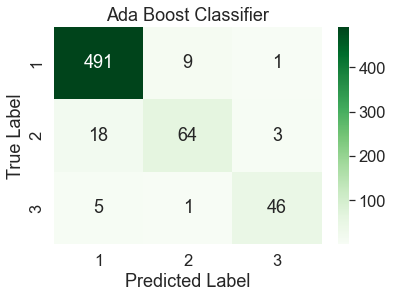

In [93]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
g =sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_adb), annot= True, cmap= 'Greens', fmt = 'g')
g.set_xticklabels(['1', '2', '3'])
g.set_yticklabels(['1', '2', '3']);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Ada Boost Classifier');

# Gradient Boosting Classifier Model.

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 2)
gb.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=2)

Accuracy of the Gradient Boosting Classifier model on training data set.

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(gb.predict(X_train), Y_train)

0.9946236559139785

Accuracy of the Gradient Boosting Classifier model on testing data set.

In [96]:
accuracy_score(gb.predict(X_test), Y_test)

0.957680250783699

GridSearchCV for hyperparameter tuning.

In [97]:
parameters = {
    'criterion' : ('friedman_mse', 'squared_error'),
    'min_samples_leaf' : range(2, 8),
    'max_features' : ('auto', 'sqrt', 'log2')
}
gs_gb = GridSearchCV(
    estimator = gb,
    param_grid = parameters,
    cv = 5,
    return_train_score = True,
)
gs_gb.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2),
             param_grid={'criterion': ('friedman_mse', 'squared_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_leaf': range(2, 8)},
             return_train_score=True)

Best score obtained for the hyperparameter tuning cross-validation.

In [98]:
gs_gb.best_score_

0.9489300160441101

Best parameter values after the hyperparameter tuning.

In [99]:
gs_gb.best_params_

{'criterion': 'friedman_mse', 'max_features': 'sqrt', 'min_samples_leaf': 4}

In [100]:
gs_results = pd.DataFrame(gs_gb.cv_results_)
gs_results = gs_results[['mean_test_score', 'mean_train_score', 'params']]
gs_results.head()

,mean_test_score,mean_train_score,params
0,0.940870,0.996808,"{'criterion': 'friedman_mse', 'max_features': ..."
1,0.938171,0.996975,"{'criterion': 'friedman_mse', 'max_features': ..."
2,0.942212,0.996975,"{'criterion': 'friedman_mse', 'max_features': ..."
3,0.941543,0.996807,"{'criterion': 'friedman_mse', 'max_features': ..."
4,0.938852,0.996640,"{'criterion': 'friedman_mse', 'max_features': ..."


Gradient Boosting Classifier accuracy with optimized parameters.

In [101]:
gb_optimized = GradientBoostingClassifier(
    random_state = 2,
    max_features = gs_gb.best_params_['max_features'],
    min_samples_leaf = gs_gb.best_params_['min_samples_leaf'] ,
    criterion = gs_gb.best_params_['criterion']
)
gb_optimized.fit(X_train, Y_train)
yhat_gb = gb_optimized.predict(X_test)

Accuracy of the optimized Gradient Boosting Classifier model on training data set.

In [102]:
accuracy_train_gb = accuracy_score(gb_optimized.predict(X_train), Y_train)
accuracy_train_gb

0.991263440860215

Accuracy of the optimized Gradient Boosting Classifier model on testing data set.

In [103]:
accuracy_test_gb = accuracy_score(gb_optimized.predict(X_test), Y_test)
accuracy_test_gb

0.9529780564263323

In [104]:
print("The overall accuracy for the optimizedGradient Boosting Classifier model on the testing data set is", str(100*round(accuracy_test_gb, 4)),"%.")

The overall accuracy for the optimizedGradient Boosting Classifier model on the testing data set is 95.3 %.


Confusion Matrix for optimized Gradient Boosting Classifier model.

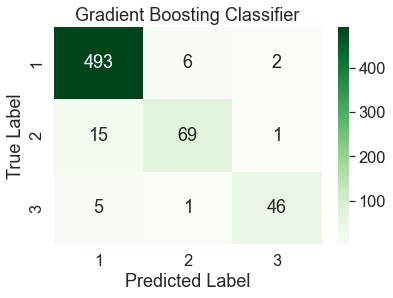

In [105]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
g =sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_gb), annot= True, cmap= 'Greens', fmt = 'g')
g.set_xticklabels(['1', '2', '3'])
g.set_yticklabels(['1', '2', '3']);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Classifier');

Summary of various model accuracies.

In [106]:
accuracies = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Support Vector Machine', 'AdaBoost', 'Gradient Boost'], 
    'Training Accuracy' : [
        accuracy_train_dt,
        accuracy_train_rf,
        accuracy_train_knn,
        accuracy_train_lr,
        accuracy_train_svc,
        accuracy_train_adb,
        accuracy_train_gb
    ],
    'Testing Accuracy' : [
        accuracy_test_dt,
        accuracy_test_rf,
        accuracy_test_knn,
        accuracy_test_lr,
        accuracy_test_svc,
        accuracy_test_adb,
        accuracy_test_gb
    ]
})

accuracies.sort_values(by = ['Testing Accuracy'], ascending = False, inplace = True)
accuracies.reset_index().drop(columns = ['index'])

,Model,Training Accuracy,Testing Accuracy
0,Gradient Boost,0.991263,0.952978
1,AdaBoost,0.999328,0.942006
2,Random Forest,0.999328,0.937304
3,Support Vector Machine,0.962366,0.934169
4,Decision Tree,0.978495,0.926332
5,K-Nearest Neighbors,0.999328,0.910658
6,Logistic Regression,0.901882,0.904389


Compare Confusion Matrices for various models.

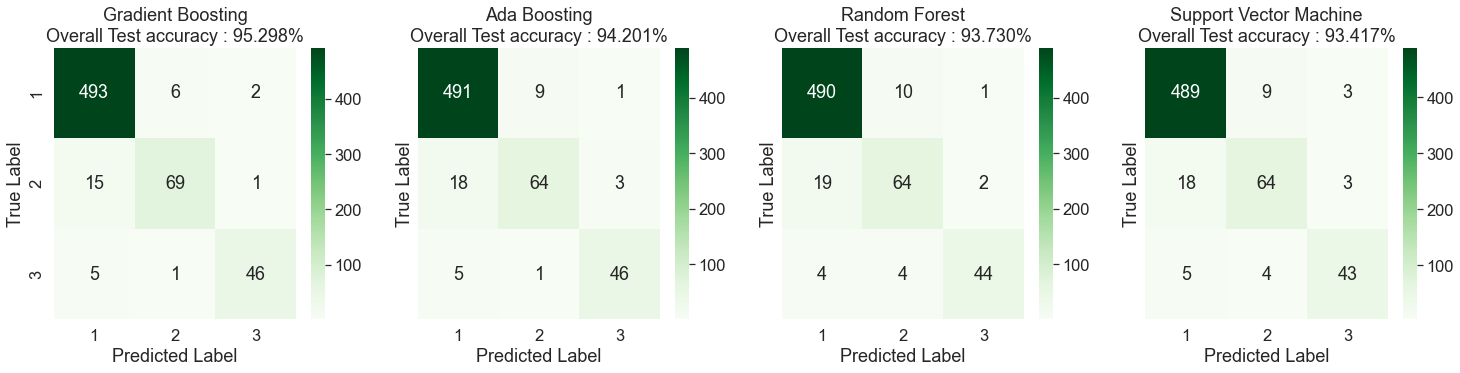

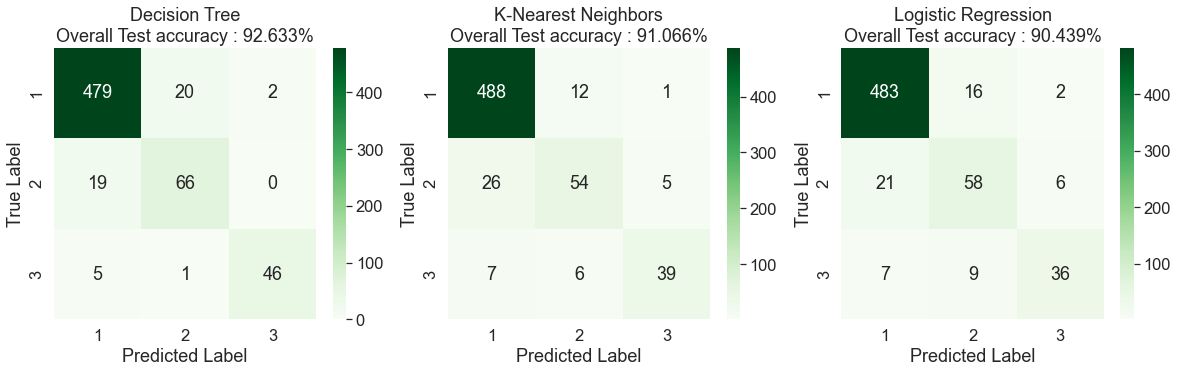

In [107]:
f,(ax1,ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(25,5))
g1 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_gb), annot= True, cmap= 'Greens', fmt = 'g', ax = ax1)
g1.set_title('Gradient Boosting\n' + "Overall Test accuracy : " + "{:.3%}".format(accuracy_test_gb))
g1.set_xticklabels(['1', '2', '3'])
g1.set_yticklabels(['1', '2', '3'])
g1.set_xlabel('Predicted Label')
g1.set_ylabel('True Label')

g2 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_adb), annot= True, cmap= 'Greens', fmt = 'g', ax = ax2)
g2.set_title('Ada Boosting\n'+ "Overall Test accuracy : " + "{:.3%}".format(accuracy_test_adb))
g2.set_xticklabels(['1', '2', '3'])
g2.set_yticklabels(['1', '2', '3'])
g2.set_xlabel('Predicted Label')
g2.set_ylabel('True Label')

g3 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_rf), annot= True, cmap= 'Greens', fmt = 'g', ax = ax3)
g3.set_title('Random Forest\n'+ "Overall Test accuracy : " + "{:.3%}".format(accuracy_test_rf))
g3.set_xticklabels(['1', '2', '3'])
g3.set_yticklabels(['1', '2', '3'])
g3.set_xlabel('Predicted Label')
g3.set_ylabel('True Label')

g4 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_svc), annot= True, cmap= 'Greens', fmt = 'g', ax = ax4)
g4.set_title('Support Vector Machine\n'+"Overall Test accuracy : " +  "{:.3%}".format(accuracy_test_svc))
g4.set_xticklabels(['1', '2', '3'])
g4.set_yticklabels(['1', '2', '3'])
g4.set_xlabel('Predicted Label')
g4.set_ylabel('True Label')

f,(ax1,ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
g1 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_dt), annot= True, cmap= 'Greens', fmt = 'g', ax = ax1)
g1.set_title('Decision Tree\n'+ "Overall Test accuracy : " + "{:.3%}".format(accuracy_test_dt))
g1.set_xticklabels(['1', '2', '3'])
g1.set_yticklabels(['1', '2', '3'])
g1.set_xlabel('Predicted Label')
g1.set_ylabel('True Label')

g2 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_knn), annot= True, cmap= 'Greens', fmt = 'g', ax = ax2)
g2.set_title('K-Nearest Neighbors\n'+ "Overall Test accuracy : " + "{:.3%}".format(accuracy_test_knn))
g2.set_xticklabels(['1', '2', '3'])
g2.set_yticklabels(['1', '2', '3'])
g2.set_xlabel('Predicted Label')
g2.set_ylabel('True Label')

g3 = sns.heatmap(confusion_matrix(y_true= Y_test, y_pred= yhat_lr), annot= True, cmap= 'Greens', fmt = 'g', ax = ax3)
g3.set_title('Logistic Regression\n'+"Overall Test accuracy : " +  "{:.3%}".format(accuracy_test_lr))
g3.set_xticklabels(['1', '2', '3'])
g3.set_yticklabels(['1', '2', '3'])
g3.set_xlabel('Predicted Label')
g3.set_ylabel('True Label');

In [108]:
print("Total runtime for the entire code in the notebook is " + str(round((time.time()-t0)/60, 2)) + ' minutes.')

Total runtime for the entire code in the notebook is 3.53 minutes.


Author

Mangaljit Singh